In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1

#### Problem 1a) 

In [2]:
X_list =  [] 
Y_list = []
for i in np.arange(100000):
    X = random.choice([-1,0,1])
    Y = random.choice([-1,0,1])
    if X ==0:
        Y = random.choice([-1,1])
    if Y==0:
        X = random.choice([-1,1])
    X_list.append(X)
    Y_list.append(Y)
X_list = np.array(X_list)
Y_list = np.array(Y_list)

In [50]:
X_list = np.array([-1,0,1,-1,1,-1,0,1])
Y_list = np.array([1,1,1,0,0,-1,-1,-1])

In [51]:
mean(X_list*Y_list)

0.0

In [54]:
mean(Y_list)

0.0

(-1.5, 1.5)

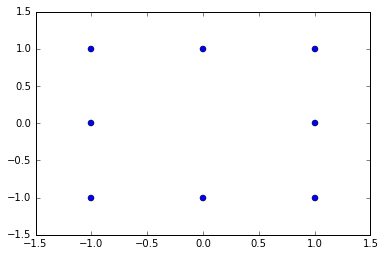

In [55]:
plt.plot(X_list,Y_list,'o')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

# Problem 2 

$$N(x) = \frac{1}{\sqrt{2\pi}\sqrt{|\Sigma|}} exp \Bigg(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\Bigg)$$

In [2]:
def compute_gaussian(x,y,cov,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(cov)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

In [3]:
from scipy.interpolate import griddata
def plot_countour(x,y,z,xmin=-5,xmax = 5,ymin=-5,ymax = 5, title=""):#,ymin=-5, ymax=5):
    xi = np.linspace(-10,10, 100)
    yi = np.linspace(-10,10, 100)
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = np.linspace(0.2,1,11)
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.jet, levels=levels)
    plt.colorbar()  
    plt.title(title,fontsize = 14)
    plt.xlabel("x",fontsize = 14)
    plt.ylabel("y",fontsize = 14)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

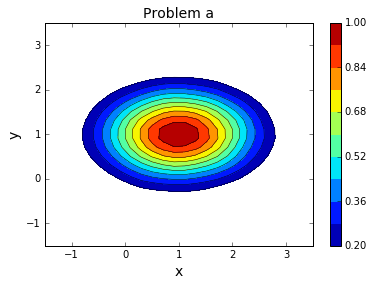

In [4]:
N=1000
cov = np.matrix([[2,0],[0,1]])
mu = np.array([1,1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-1.5,3.5,-1.5,3.5,title="Problem a")

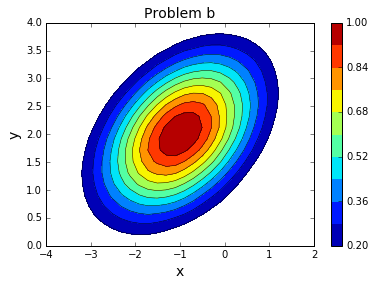

In [5]:
N=1000
cov = np.matrix([[3,1],[1,2]])
mu = np.array([-1,2])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z = compute_gaussian(x,y,cov,mu)
plot_countour(x,y,z,-4,2,0,4,title="Problem b")

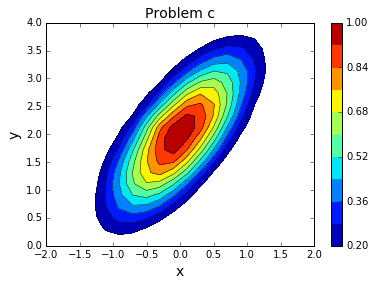

In [6]:
N=1000
cov = np.matrix([[1,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem c")

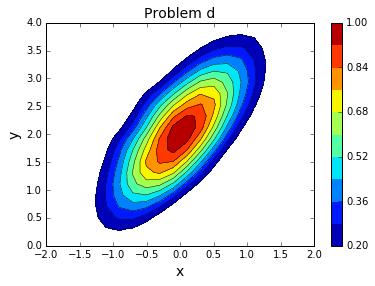

In [7]:
N=1000
cov = np.matrix([[1,1],[1,2]])
cov2 = np.matrix([[3,1],[1,2]])
mu1 = np.array([0,2])
mu2 = np.array([2,0])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-2,2,0,4,title="Problem d")

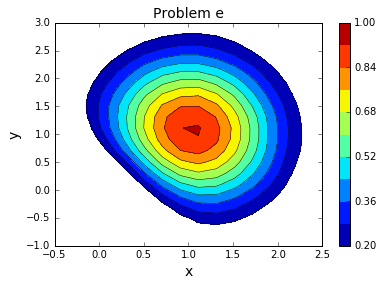

In [8]:
N=1000
cov = np.matrix([[1,0],[0,2]])
cov2 = np.matrix([[2,1],[1,2]])
mu1 = np.array([1,1])
mu2 = np.array([-1,-1])
x = uniform(-5,5,N)
y = uniform(-5,5,N)
z1 = compute_gaussian(x,y,cov,mu1)
z2 = compute_gaussian(x,y,cov2,mu2)
plot_countour(x,y,z1-z2,-0.5,2.5,-1,3,title="Problem e")

# Problem 3

#### Problem 3a ) 

In [2]:
N = 100
X1 = []
X2 = []
mu1 = 3
sig1 = sqrt(9)
mu2 = 4
sig2 = sqrt(4)
for i in np.arange(N):
    X1.append(random.normal(mu1,sig1))
for i in np.arange(N):
    X2.append(random.normal(mu2,sig2))   
X1 = np.array(X1)
X2 = 0.5*np.array(X1) +np.array(X2)

In [3]:
mu1_sample = mean(X1)
mu2_sample = mean(X2)
print "Problem 3a: The mean of the sample X1 = ",mu1_sample
print "The mean of the sample X2 = ",mu2_sample

Problem 3a: The mean of the sample X1 =  3.27849250252
The mean of the sample X2 =  5.42288758744


In [4]:
#Mean vector 
mu = np.array([mu1_sample,mu2_sample])
# print mu

#### Problem 3b)

$$\Sigma = \left [ E[(X_1 - \mu_1)(X_1 - \mu_1)]  E[(X_1 - \mu_1)(X_2 - \mu_2)]  \\
\quad E[(X_2 - \mu_2)(X_1 - \mu_1)]  E[(X_2 - \mu_2)(X_2 - \mu_2)\right] $$

In [5]:
# print "Covariance matrix ="
# covmat = np.matrix([[mean((X1-mu1)*(X1-mu1)),mean((X1-mu1)*(X2-mu2))],[mean((X2-mu2)*(X1-mu1)),mean((X2-mu2)*(X2-mu2))]])
# print covmat

In [6]:
covmat = np.cov([X1,X2])
print covmat

[[ 10.97489968   6.57140413]
 [  6.57140413   7.57933735]]


#### Problem 3c) 

In [7]:
numpy.linalg.eig(covmat)

(array([ 16.06429857,   2.48993845]), array([[ 0.79061536, -0.61231312],
        [ 0.61231312,  0.79061536]]))

In [8]:
eigenvalue =  numpy.linalg.eig(covmat)[0]
eigenvector =  numpy.linalg.eig(covmat)[1]

In [9]:
print "Eigenvalue: " , eigenvalue
print "Eigenvector: " , eigenvector[0] ,"and" , eigenvector[1]

Eigenvalue:  [ 16.06429857   2.48993845]
Eigenvector:  [ 0.79061536 -0.61231312] and [ 0.61231312  0.79061536]


#### Problem 3d) 

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


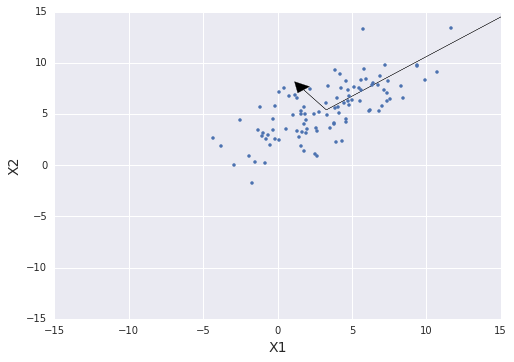

In [10]:
import seaborn 
fig, ax = plt.subplots()
plt.plot(X1,X2,'.')
plt.xlim(-15,15)
plt.ylim(-15,15) 
dr =  eigenvalue[1] * np.array(eigenvector[0])
dr2 =  eigenvalue[0] * np.array(eigenvector[1])
ax.arrow(mu1_sample, mu2_sample, dr[1], dr[0], head_width=1, head_length=1,fc='k')#, fc='k', ec='k')
ax.arrow(mu1_sample, mu2_sample, dr2[1], dr2[0], head_width=1, head_length=1,fc='k')#, fc='k', ec='k')
plt.xlabel("X1",fontsize=14)
plt.ylabel("X2",fontsize=14)

#### Problem 3 e) 

Rotated ellipse so that the original axes are now in the coordinate direction.

(-15, 15)

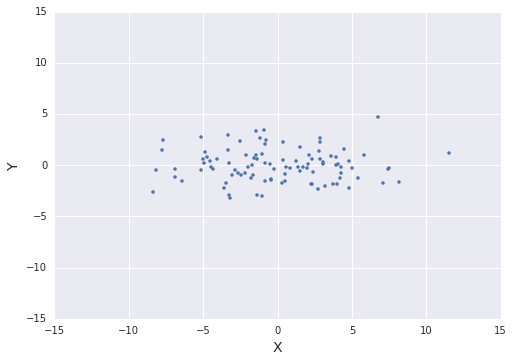

In [11]:
newX12 = np.dot(eigenvector.T,(X1-mu[0], X2-mu[1]))
plt.plot(newX12[0,:],newX12[1,:],'.')
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.xlim(-15,15)
plt.ylim(-15,15)

# Problem 5

#### Problem 5 a) , c) 

In [3]:
import scipy.io
from sklearn import svm
from sklearn import metrics
DEBUG=False
digit_data_test = scipy.io.loadmat("data/digit_dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit_dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
#Flatten the image into 784 pixel long vector 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat1= np.array(train_img_flat)

#get a list of 10100 unique random numbers for indexing 
N=50000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)


In [4]:
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices

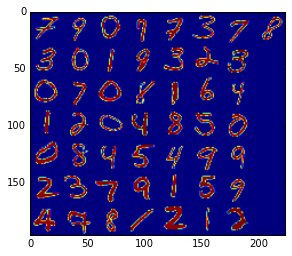

In [5]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,N))[:,:,:50]))

Normalizing the image by dividing by L2 norm: 
$$    L2  = \sqrt{\sum |x_k|^2}$$

In [5]:
# sqrt(sum(img**2))
# np.linalg.norm(train_subset,axis=1)

In [6]:
train_subset_normalized = []
for i in np.arange(N):
    img = train_subset[i,:]
    L2 =sqrt(sum(img**2))
    train_subset_normalized.append(img/L2)
train_subset_normalized = np.array(train_subset_normalized)

In [7]:
len(np.where(train_subset_normalized>1)[0])

5525416

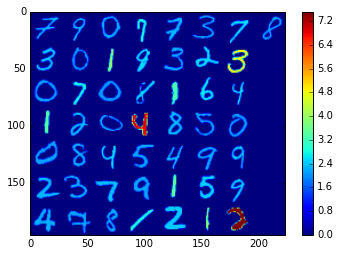

In [8]:
plt.imshow(montage_images(train_subset_normalized.T.reshape((28,28,N))[:,:,:50]))
plt.colorbar()

Using MLE, we find that the best fit parameters for Gaussian pdf is $\hat{\mu} =$ sample mean and $\hat{\sigma}^2 =$ sample variance. 

For each digit class, we select the images that are labelled for that class then we compute the covariance 

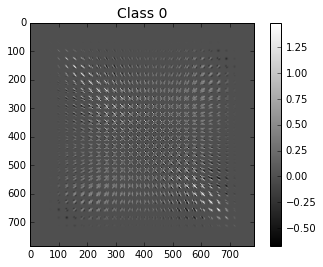

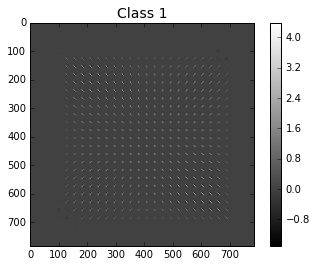

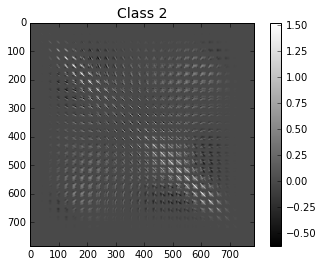

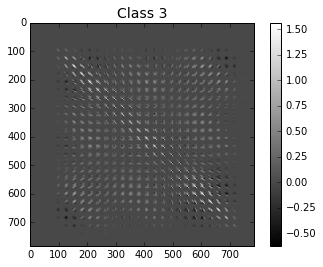

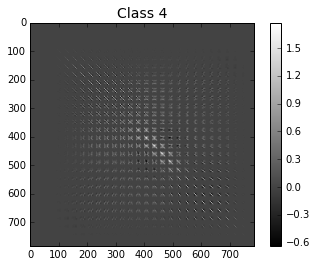

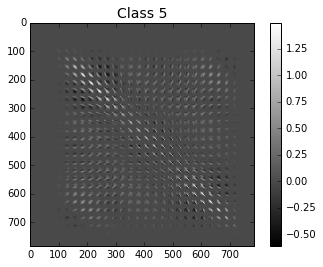

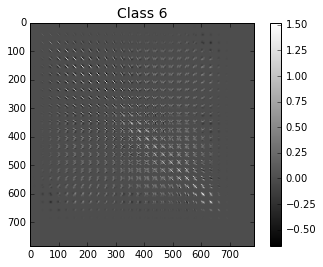

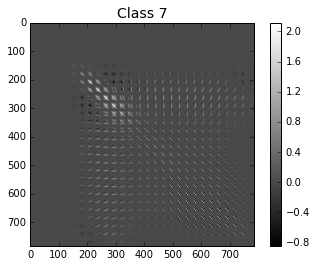

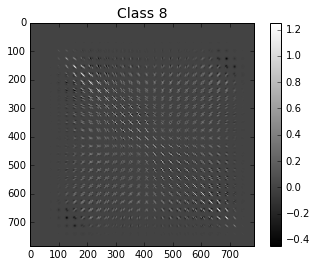

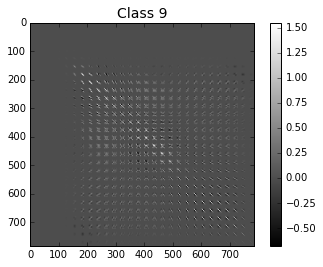

In [9]:
if DEBUG: shape(np.sum(train_subset_normalized[idx],axis=0))
covmat_list = []
mvec_list = []
for i in np.arange(10):
    plt.figure()
#     print "For digit class ", i ," : "
    idx  = np.where(labels_subset==i)[0]
    dat = train_subset_normalized[idx].T
    mvec = np.array(np.sum(train_subset_normalized[idx],axis=0)/shape(dat)[1])
#     print mvec
    covmat = np.cov(dat)
    plt.imshow(covmat,cmap = cm.gray)
    plt.title("Class {}".format(i),fontsize=14)
    plt.colorbar()
    covmat_list.append(covmat)
    mvec_list.append(mvec)
covmat_list=np.array(covmat_list)
mvec_list = np.array(mvec_list)

The covariance matrix is a 784x784 matrix as 784 is the number of features.
The elements along the diagonal are the $E[X_n,X_n]$ elements, these are simply the variance of the feature. (e.g. $E[X_8,X_8]$ at pixel 35 on every image, what is the variance that this is a digit 8) The nondiagonal elements are the ones that the covariance, what is the variance that even though this is a feature digit 4 but looks like feature digit 8. This makes sense if we examine the matrix of Class 7, since our image is flatterned as a long vector and we start writing from left-to-right, top-to-bottom. We find that  for seven we have low variance to start off with because people may start of writing their 7s very differently but most of them end with a straight line so they are quite simmilar.

#### Problem 5b) 

Estimating prior for QDA :
$$ \hat{\pi_c} = \frac{n_c}{\sum_D n_D}$$

From the labels we know the number of digits that is classified as a certain class

In [10]:
prior_list = []
for c in np.arange(10):
    denom = len(labels_subset)
    n_c  = len(np.where(labels_subset==c)[0])
    prior = n_c / float(denom)
    prior_list.append(prior)
    print "Prior for Class ", c,":",prior
prior_list = np.array(prior_list)

Prior for Class  0 : 0.09898
Prior for Class  1 : 0.1121
Prior for Class  2 : 0.09902
Prior for Class  3 : 0.10304
Prior for Class  4 : 0.09706
Prior for Class  5 : 0.09038
Prior for Class  6 : 0.09882
Prior for Class  7 : 0.10376
Prior for Class  8 : 0.09786
Prior for Class  9 : 0.09898


These probabilities make sense because they are close to 1/10 (assuming equal occurence), but they are sampled randomly (not uniformly) in the MNIST dataset so it is something around that value

In [11]:
1/10.

0.1

Check that the probability adds up to 1 

In [12]:
sum(prior_list)==1.0

False

####Q5.d. Please hold out 10,000 points from the training set for validation. Rather than training on 60,000 points at the max, train on 50,000. Report error rates on the 10,000 point training set, similar to HW1. 

####Q5.f. "Can you tie this in with what you proved in part 4.d", not "Can you tie this in with what you proved in part 6.f". 

Choose class C that maximizes the linear discriminant function : 
    $$f_c(x) = \mu_c^T \Sigma^{-1} x - \frac{1}{2}\mu_c^T \Sigma^{-1}\mu_c+ln\pi_c$$

#### Problem 5d) i) 

Since we are assuming that the covariance is the same, this is a linear discriminant analysis problem

We compute the f(x) for each digit class and then this gives us the probability for each class, the largest number means that the datapoint x is most likely to be in this class. So this gives us our classification. 
                $$argmax[f_c(x)] $$

In [21]:
avrg_covmat = np.sum(covmat_list,axis=0)/10.
avrg_pmat = np.linalg.inv(avrg_covmat + np.identity(784)*0.001)#Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)

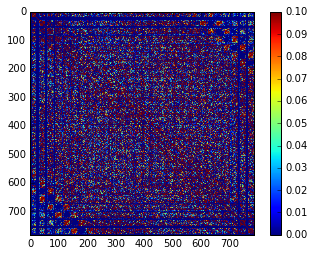

In [22]:
plt.imshow(avrg_pmat, vmin=0, vmax=0.1)
plt.colorbar()

In [29]:
def compute_fc(c,x):
    mu_c = mvec_list[c]
    return np.dot(np.dot(mu_c.T,avrg_pmat),x) - 0.5*np.dot(np.dot(mu_c.T,avrg_pmat),mu_c)+np.log(prior_list[c])

In [30]:
trainset_size = [100,200,500,1000,2000,5000,10000,30000,50000]
err_list = []
for N in trainset_size:
    print "Working on ", N
    y_pred= []
    avrg_covmat = np.sum(covmat_list,axis=0)/10.
    pmat = np.linalg.inv(avrg_covmat+np.identity(784)*0.001) #Inverse of precision matrix (adding a small value of identity matrix to avoid LinAlgError: Singular matrix Error)
    for i in np.arange(N):
        #Examining the ith image dataset
        x = train_subset_normalized[i]
        #Looping through each class
        f_list = []
        for c in np.arange(10):
            f_list.append(compute_fc(c,x))
        y_pred.append(np.argmax(f_list)) 
    err_list.append(benchmark(np.array(y_pred),labels_subset[:N])[0])

Working on  100
Working on  200
Working on  500
Working on  1000
Working on  2000
Working on  5000
Working on  10000
Working on  30000
Working on  50000


In [35]:
print err_list

[0.19, 0.16, 0.158, 0.154, 0.16450000000000001, 0.1714, 0.1767, 0.17783333333333334, 0.17560000000000001]


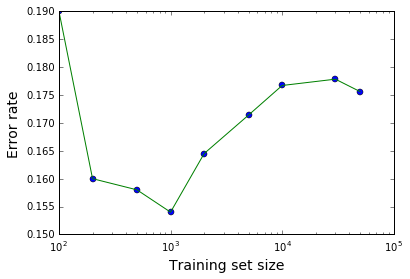

In [32]:
plt.semilogx(trainset_size,err_list,'o')
plt.semilogx(trainset_size,err_list,'-')
plt.xlabel("Training set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)

As mentioned in the problem, there are some variance in the error rate in the small training sets (<5000 samples) but beyond that we see the trend of decreasing error rates as training set size increases. The decision boundary in LDA is effectively a linear boundary since the variances on the modelled Gaussians are the same for all digit classes.

##### ii) 

In [93]:
pmat_list = []
for c in np.arange(10):
    pmat_list.append(np.linalg.inv(covmat_list[c]+ np.identity(784)*0.001))
pmat_list=np.array(pmat_list)

In [94]:
# plt.imshow(pmat_list[7], vmin=0, vmax=0.1)
# plt.colorbar()

Choose class C that maximizes the linear discriminant function : 
    $$f_c(x) = \mu_c^T \Sigma^{-1} x - \frac{1}{2}\mu_c^T \Sigma^{-1}\mu_c+ln\pi_c$$

In [95]:
def compute_fc2(c,x):
    pmat = pmat_list[c]
    mu_c = mvec_list[c]
    return np.dot(np.dot(mu_c.T,pmat),x) - 0.5*np.dot(np.dot(mu_c.T,pmat),mu_c)+np.log(prior_list[c])

In [96]:
#Examining the ith image dataset
x = train_subset_normalized[c]
#Looping through each class
f_list = []
for c in np.arange(10):
    f_list.append(compute_fc2(c,x))
print np.argmax(f_list)

8


In [97]:
f_list

[3.5455149422201258,
 0.89682914764662591,
 3.9623249879675502,
 1.6308877180261088,
 -0.7607072930818477,
 3.7689664106313865,
 3.3359258058991332,
 -0.01454249655160611,
 4.1032233393202944,
 -6.7615150726601554]

In [100]:
N=100
y_pred= []
for i in np.arange(N):
    #Examining the ith image dataset
    x = train_subset_normalized[i]
    #Looping through each class
    f_list = []
    for c in np.arange(10):
        f_list.append(compute_fc2(c,x))
#     print f_list
    y_pred.append(np.argmax(f_list)) 
print benchmark(np.array(y_pred),labels_subset[:N])[0]

0.97


In [101]:
np.array(y_pred)

array([6, 6, 9, 4, 0, 8, 5, 2, 2, 8, 5, 1, 4, 9, 2, 8, 3, 6, 8, 2, 8, 6, 2,
       9, 5, 5, 5, 2, 6, 1, 2, 7, 4, 3, 1, 9, 8, 0, 2, 9, 6, 7, 5, 8, 2, 8,
       7, 7, 2, 2, 8, 6, 4, 4, 6, 5, 1, 9, 6, 6, 2, 7, 7, 8, 7, 1, 9, 9, 7,
       5, 5, 1, 5, 7, 2, 9, 6, 9, 7, 8, 1, 5, 8, 1, 8, 7, 5, 6, 5, 7, 8, 9,
       4, 8, 7, 4, 6, 5, 0, 1])

In [102]:
labels_subset[:100]

array([8, 0, 8, 4, 1, 4, 6, 9, 8, 7, 4, 5, 7, 3, 3, 5, 1, 2, 4, 6, 5, 5, 9,
       1, 4, 8, 6, 8, 7, 0, 6, 3, 7, 1, 5, 3, 1, 8, 7, 0, 8, 6, 4, 6, 4, 4,
       8, 0, 3, 4, 1, 6, 4, 2, 7, 8, 9, 5, 0, 3, 4, 6, 0, 4, 2, 0, 7, 2, 2,
       2, 2, 9, 9, 2, 5, 1, 5, 1, 2, 6, 0, 4, 2, 0, 3, 3, 0, 0, 3, 6, 1, 2,
       2, 6, 2, 7, 7, 2, 8, 0], dtype=uint8)

In [103]:
trainset_size = [100,200,500,1000,2000,5000,10000,30000,50000]
err_list2 = []
for N in trainset_size:
    print "Working on ", N
    y_pred= []
    for i in np.arange(N):
        #Examining the ith image dataset
        x = train_subset_normalized[i]
        #Looping through each class
        f_list = []
        for c in np.arange(10):
            f_list.append(compute_fc2(c,x))
        y_pred.append(np.argmax(f_list)) 
    err_list2.append(benchmark(np.array(y_pred),labels_subset[:N])[0])

Working on  100
Working on  200
Working on  500
Working on  1000
Working on  2000
Working on  5000
Working on  10000
Working on  30000
Working on  50000


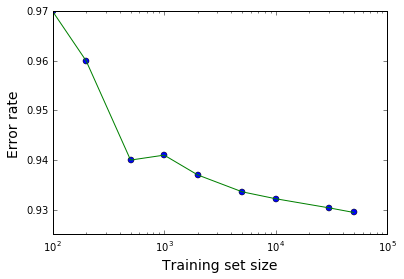

In [107]:
plt.semilogx(trainset_size,err_list2,'o')
plt.semilogx(trainset_size,err_list2,'-')
plt.xlabel("Training set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)

#### iii)  

What we did in part i is LDA whereas part ii is QDA (different covariance matrix). LDA tends to underfit, so we can see that it is especially bad when the training test size is small. 

#### iv) 

Training on all 50000 images for Kaggle using LDA on the images in test.mat 

In [61]:
N = shape(digit_data_test['test_images'])[0]

In [50]:
digit_data_test = scipy.io.loadmat("data/digit_dataset/test.mat")
test_data = digit_data_test['test_images']

In [63]:
test_data_normalized = []
for i in np.arange(shape(digit_data_test['test_images'])[0]):
    img = test_data[i,:]
    L2 =sqrt(sum(img**2))
    test_data_normalized.append(img/L2)
test_data_normalized = np.array(test_data_normalized)

In [66]:
y_pred= []
for i in np.arange(N):
    #Examining the ith image dataset
    x = test_data_normalized[i]
    #Looping through each class
    f_list = []
    for c in np.arange(10):
        f_list.append(compute_fc(c,x))
    y_pred.append(np.argmax(f_list)) 

In [69]:
result = np.array(y_pred)

In [70]:
a = numpy.array([np.arange(1,10001),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Digits.csv", a, delimiter=",",fmt='%i')

(10000, 2)


#### e) Gaussian classifications on spam

In [ ]:
spam_data_test = scipy.io.loadmat("data/spam_dataset/spam_data.mat")
Xtrain= housing_data_test['Xtrain']
Xvalidate= housing_data_test['Xvalidate']
Ytrain= housing_data_test['Ytrain']
Yvalidate= housing_data_test 
['Yvalidate']

# Problem 6

In [198]:
housing_data_test = scipy.io.loadmat("data/housing_dataset/housing_data.mat")
Xtrain= housing_data_test['Xtrain']
Xvalidate= housing_data_test['Xvalidate']
Ytrain= housing_data_test['Ytrain']
Yvalidate= housing_data_test['Yvalidate']

#### Question 6.1 ) 

Using Maximum log likelihood estimation, we get the least square fit function  that we want to minimize over: 

$$\sum^N_{i=1} [y_i - y(x_i; a_1...a_M)]^2$$

where a1...aM is the parameter, in our case of the linear fit it will simply be parameters a,b from the model $y=ax+b$
and $x_i$ is the datapoints and $y_i$ is the training data points

But since our housing data has 8 dimensions, we want to generalize this into 8+1 dimensions (+1 because of the constant term ($i$) ), so our linear model should instead look like: 
$$y = ax_{1i}+bx_{2i}+cx_{3i}+dx_{4i}+ex_{5i}+fx_{6i}+gx_{7i}+hx_{8i}+i = \mathbf{w^T} \mathbf{x}$$

where $x = [x_1...x_8]$ and $\mathbf{w} = [a,...,h,i]$

Minimizing sum of squares residual : 
    $$\sum^N_{i=1} [y_i - y(x_i; a_1...a_M)]^2 = (\mathbf{Y}-\mathbf{Xw})^T (\mathbf{Y}-\mathbf{Xw}) $$

Linear regression has the closed form solution that we obtained in HW 1 : 


$$\mathbf{w}=(\mathbf{X^T \Lambda X})^{-1}(\mathbf{X^T\Lambda Y} ) =(\mathbf{X^T X})^{-1}(\mathbf{X^T Y} )$$

since we are not assigning weights to these linear regression (i.e. all variables weighted equally), the $\mathbf{\Lambda}$  is just the identity matrix. 

In [220]:
x = Xtrain
#adding bias term 
x =np.insert(x,8,np.ones(shape(x)[0]),axis=1)
y = np.ndarray.astype(Ytrain[:,0],dtype=float)
n = shape(x)[0]
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
y_pred = np.dot(x,w.T)

#### Question 6.2) 

Range of predicted values

In [158]:
print max(y_pred)
print min(y_pred)

707901.770571
-653471.850389


Range of actual values

In [159]:
print max(y)
print min(y)

500001.0
14999.0


In [218]:
residual  =sum((y-y_pred)**2)
print "Residual sum of squares: " , residual

Residual sum of squares:  9.39511852879e+13


#### Question 6.3) 

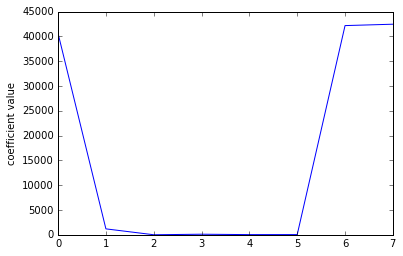

In [211]:
plt.plot(abs(w)[:-1])
plt.ylabel("coefficient value")

This tells us that the median house values depend heavily on index 0, 6, and 7, which corresponds to median income, latitude, longitude, which intuitively makes sense. 

#### Question 6.4) 

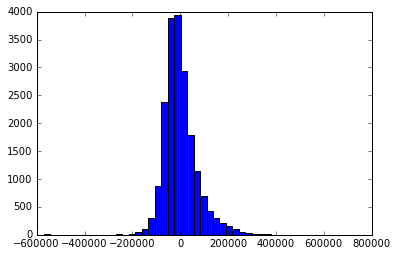

In [216]:
histo =  plt.hist(y-y_pred,50)

This is a Gaussian centered around 0, which tells us that most of the data in our training example is located close to zero. There isn't a lot of outliers in the training data

In [ ]:
histo =  plt.hist(y,50)

##References: 
- "Pylab_examples Example Code: Arrow_demo.py." Pylab_examples Example Code: Arrow_demo.py — Matplotlib 1.5.1 Documentation. N.p., n.d. Web. 21 Feb. 2016.
- "Matplotlib: Making 2D Gaussian Contours with Transparent Outermost Layer." _Python_. N.p., n.d. Web. 21 Feb. 2016.
- "Covariance Matrix." _Wikipedia_. Wikimedia Foundation, n.d. Web. 21 Feb. 2016.
- Raschka, Sebastian. "Linear Discriminant Analysis Bit by Bit." _Linear Discriminant Analysis Bit by Bit_. N.p., n.d. Web. 22 Feb. 2016.